In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Student_Performance_Data.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1015, 27)


,gender,race/ethnicity,parental level of education,lunch,age,country_region,years_in_us,family_income_usd,financial_support,work_hours_per_week,...,library_usage_hours,stress_level,homesickness_level,academic_pressure,social_support_score,visa_type,work_restriction_impact,prev_sem_gpa,english_proficiency_score,semester_gpa
0,female,group B,bachelor's degree,standard,24.0,Other,4.0,131193.0,Scholarship,16.0,...,9.7,8.0,9.0,7.0,9.0,F1,10.0,3.60,81.8,2.49
1,female,group C,some college,standard,21.0,Nigeria,4.0,23471.0,Loan,2.0,...,5.3,10.0,7.0,10.0,3.0,F1,2.0,3.57,103.6,2.36
2,female,group B,master's degree,standard,28.0,Germany,3.0,127332.0,Loan,25.0,...,13.8,2.0,10.0,6.0,1.0,J1,5.0,2.73,108.9,2.26
3,male,group A,associate's degree,free/reduced,25.0,South Korea,1.0,140312.0,Self-funded,14.0,...,2.0,9.0,8.0,10.0,1.0,F1,1.0,3.98,110.9,1.98
4,male,group C,some college,standard,22.0,Germany,4.0,143379.0,Loan,3.0,...,10.1,3.0,6.0,4.0,7.0,F1,9.0,3.19,86.0,2.57


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numeric features
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
corr = df.corr(numeric_only=True)['semester_gpa'].sort_values(ascending=False)
print(corr)

# Top 10 strongest correlations
corr.head(10)

semester_gpa                     1.000000
study_hours_per_week             0.481849
prev_sem_gpa                     0.334555
social_support_score             0.305960
sleep_hours_per_day              0.227821
attendance_percentage            0.184987
screen_time_hours                0.035553
years_in_us                      0.021506
work_hours_per_week              0.008396
family_income_usd               -0.004740
english_proficiency_score       -0.007941
work_restriction_impact         -0.011861
campus_activity_participation   -0.021909
age                             -0.031638
library_usage_hours             -0.043355
stress_level                    -0.318824
academic_pressure               -0.349963
homesickness_level              -0.377228
Name: semester_gpa, dtype: float64


,semester_gpa
semester_gpa,1.000000
study_hours_per_week,0.481849
prev_sem_gpa,0.334555
social_support_score,0.305960
sleep_hours_per_day,0.227821
attendance_percentage,0.184987
screen_time_hours,0.035553
years_in_us,0.021506
work_hours_per_week,0.008396
family_income_usd,-0.004740


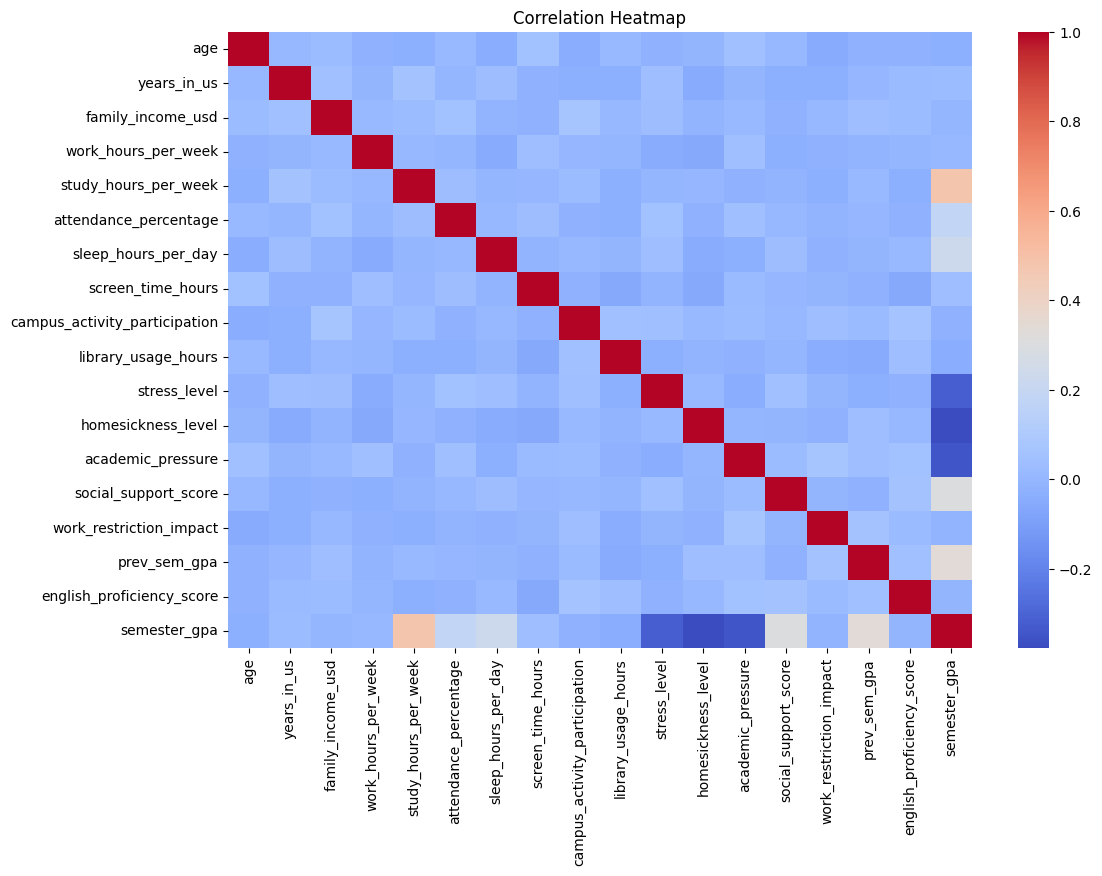

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Label encode categorical columns
le_dict = {}   # store encoders for later use in prediction
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [ ]:
target_column = "semester_gpa"   # <-- CHANGE THIS to your target column
X = df.drop(target_column, axis=1)
y = df[target_column]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "CatBoost": CatBoostRegressor(verbose=0)
}

results = {}
test_r2_scores = []
# Train & evaluate models
for name, model in models.items():
    print("\n---------------------------")
    print(f"Training: {name}")
    print("---------------------------")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    test_r2_scores.append(r2)

    print("RMSE:", rmse)
    print("R² Score:", r2)

    results[name] = (rmse, model)


---------------------------
Training: Linear Regression
---------------------------
RMSE: 0.07895799232144067
R² Score: 0.9372383906134707

---------------------------
Training: Random Forest
---------------------------
RMSE: 0.1613930628875208
R² Score: 0.7377765028781967

---------------------------
Training: Gradient Boosting
---------------------------
RMSE: 0.12870506183458522
R² Score: 0.8332395213770842

---------------------------
Training: SVR
---------------------------
RMSE: 0.12961542647943314
R² Score: 0.8308720970077959

---------------------------
Training: KNN Regressor
---------------------------
RMSE: 0.23368146360239134
R² Score: 0.4502687748894887

---------------------------
Training: Ridge Regression
---------------------------
RMSE: 0.07904042851227915
R² Score: 0.9371072695267426

---------------------------
Training: Lasso Regression
---------------------------
RMSE: 0.08918839290652422
R² Score: 0.9199210159691742

---------------------------
Training: CatBoo

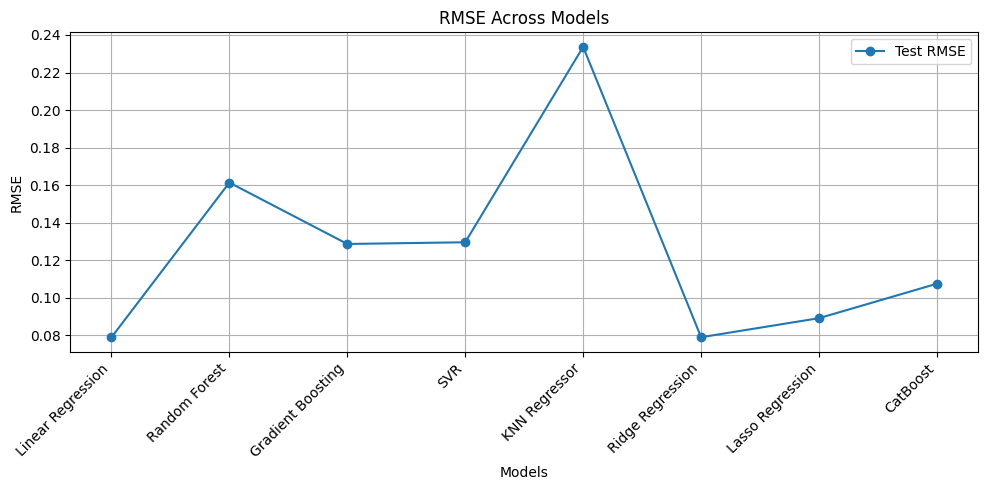

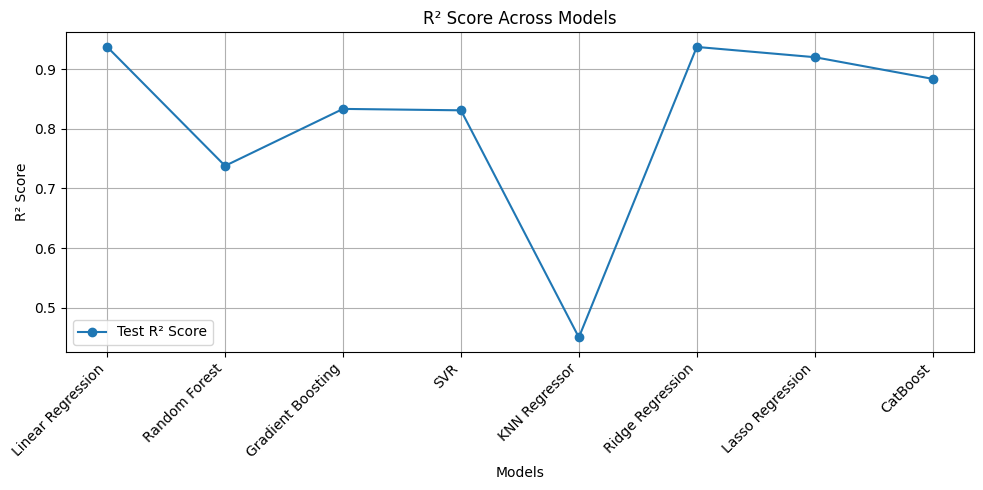

In [ ]:
rmse_scores=[]
model_names=[]

for name, (rmse, model) in results.items():
    rmse_scores.append(rmse)
    model_names.append(name)

plt.figure(figsize=(10,5))
plt.plot(model_names, rmse_scores, marker='o', label="Test RMSE")

plt.title("RMSE Across Models")
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,5))
plt.plot(model_names, test_r2_scores, marker='o', label="Test R² Score")

plt.title("R² Score Across Models")
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
best_model_name = min(results, key=lambda k: results[k][0])
best_model = results[best_model_name][1]

print("\n===================================")
print("Best Model:", best_model_name)
print("===================================")


Best Model: Linear Regression


In [ ]:
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_dict, "encoders.pkl")

print("\nModel, scaler, and encoders saved!")


Model, scaler, and encoders saved!


In [ ]:
def predict_gpa(user_input_dict):
    # Load saved objects
    model = joblib.load("best_model.pkl")
    scaler = joblib.load("scaler.pkl")
    encoders = joblib.load("encoders.pkl")

    # Convert to DataFrame
    user_df = pd.DataFrame([user_input_dict])

    # Ensure ALL columns exist
    required_columns = X.columns  # X must be accessible from the outer scope

    for col in required_columns:
        if col not in user_df.columns:
            # If the model was trained on this column, add default values
            if col in encoders:
                user_df[col] = "unknown"
            else:
                user_df[col] = 0

    # Encode categorical features
    for col in encoders:
        le = encoders[col]
        if user_df[col].iloc[0] not in le.classes_:
            # Add unknown class if needed
            le.classes_ = np.append(le.classes_, user_df[col].iloc[0])
        user_df[col] = le.transform(user_df[col])

    # Reorder columns exactly as training data
    user_df = user_df[required_columns]

    # Scale numerical values
    user_scaled = scaler.transform(user_df)

    # Predict
    prediction = model.predict(user_scaled)[0]
    return prediction

In [ ]:
print(predict_gpa({
    "gender": "male",
    "study_hours": 3,
    "parent_education": "highschool",
    "attendance": 115,
    "extra_classes": 0,
    "past_gpa": 9.5
}))

1.3232887787128094
